# Описание тестового стенда

Измерения проводились на ноутбуке HP Laptop 15s-eq2xxx:
- ОС: Ubuntu 22.04;
- Процессор: AMD Ryzen 5 5500U with Radeon Graphics, 2100 МГц, ядер: 6, логических процессоров: 12;
- ОЗУ: 8Гб.

Были закрыты все приложения, был подключен к питанию ноутбук, сделан bash-скрипт, который чистил кэш и запускал программу на данных. Программа была скомпилирована в release mode (dotnet build -c release)

# Датасет

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = [
    "linpack_x86_instrew_fastcc_opt2",
    "linpack_x86_instrew_fastcc_opt3",
    "linpack_x86_instrew_fastcc_opt2_callret",
    "linpack_x86_box64",
    "linpack_x86_qemu_x86",
    "linpack_rv64_instrew_fastcc_opt2",
    "linpack_rv64_instrew_fastcc_opt3",
    "linpack_rv64_instrew_fastcc_opt2_callret",
    "linpack_rv64_native",
    "linpack_rv64_qemu_riscv64"
]
data_dict = dict()

for x in data:
    with open(f'../bench-data/{x}.txt') as file:
        data_dict[x] = [float(y) for y in file]

for key, val in data_dict.items():
    print(f'key = {key}, val = {val}\n')
# print(data_dict)

# print(data_dict)
# with open("raw_data/linpack_x86_instrew_fastcc_opt2.txt") as file:
#     t = [float(x) for x in file]
# print(t)


key = linpack_x86_instrew_fastcc_opt2, val = [51236.253, 51225.056, 51236.298, 51197.634, 51237.142, 51244.558, 51223.951, 51239.733, 51234.775, 51257.786, 51269.368, 51262.73, 51263.716, 51274.879, 51256.317, 51332.847, 51330.209, 51336.82, 51323.293, 51329.22, 51313.128, 51312.858, 51311.6, 51299.943, 51272.34]

key = linpack_x86_instrew_fastcc_opt3, val = [51304.142, 51321.308, 51326.028, 51325.443, 51318.326, 51262.311, 51250.594, 51253.328, 51256.698, 51255.002, 51278.88, 51261.803, 51270.37, 51276.973, 51265.832, 51377.377, 51380.59, 51381.792, 51382.475, 51377.891, 51299.471, 51287.078, 51296.178, 51292.511, 51293.244]

key = linpack_x86_instrew_fastcc_opt2_callret, val = [51710.539, 51697.947, 51706.888, 51707.839, 51681.942, 51659.721, 51677.156, 51686.485, 51691.425, 51686.386, 51575.026, 51575.207, 51622.796, 51621.174, 51630.055, 51622.341, 51633.683, 51647.776, 51632.197, 51626.063, 51750.302, 51731.539, 51742.228, 51732.567, 51748.359]

key = linpack_x86_box64, val = [105

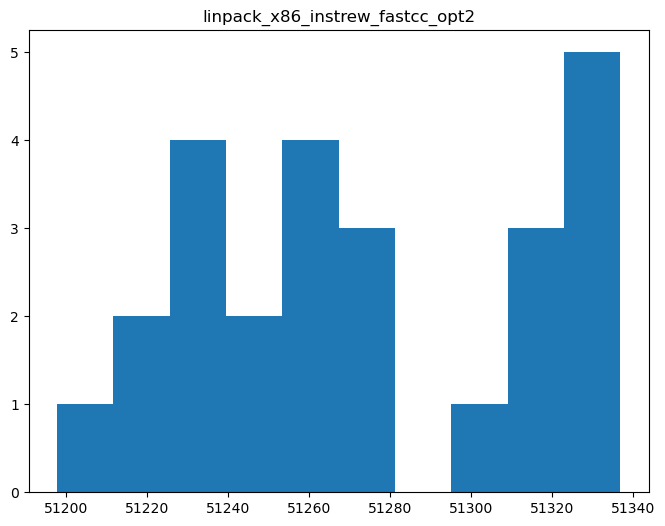

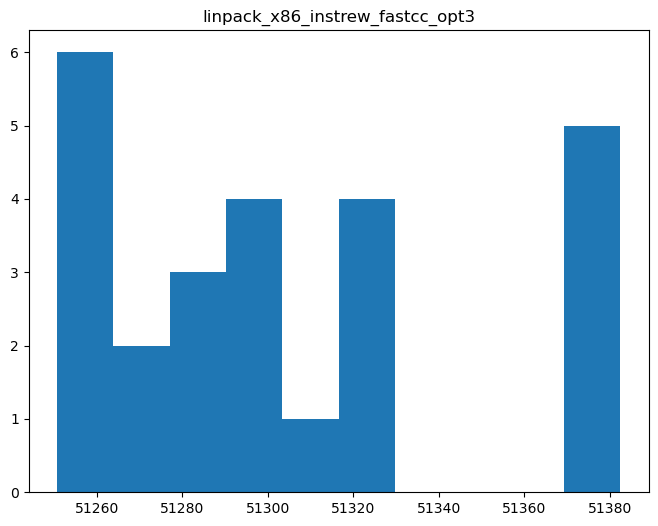

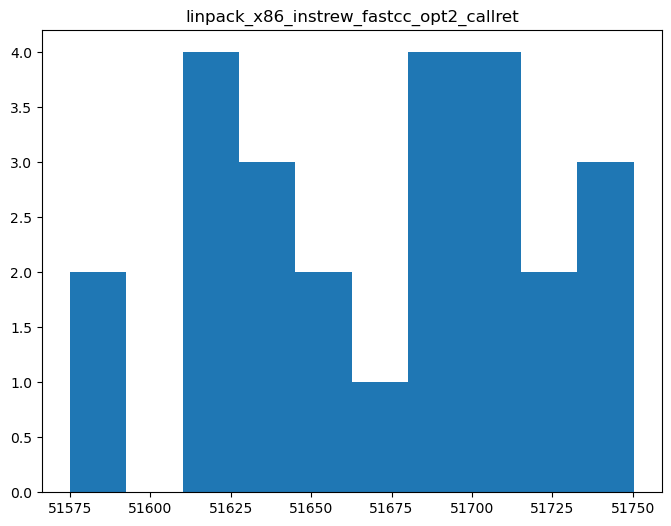

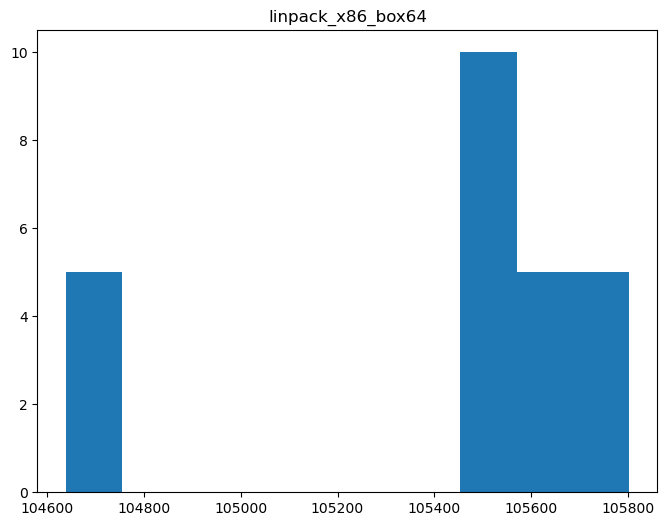

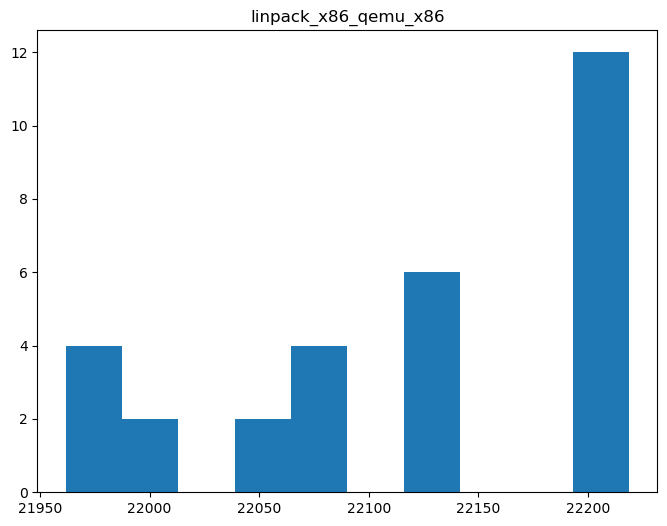

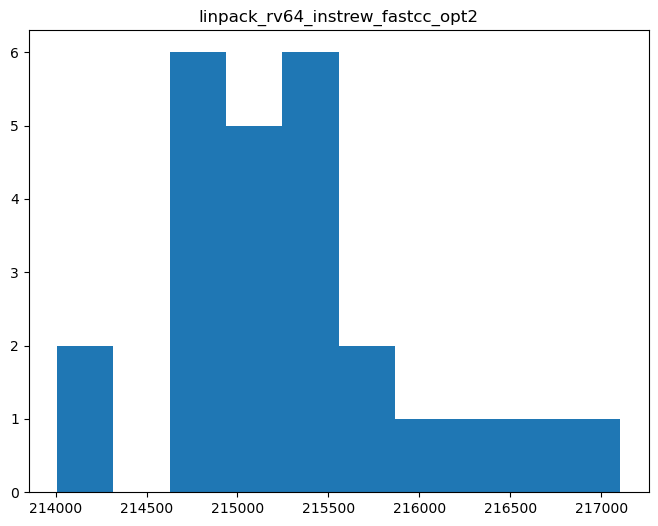

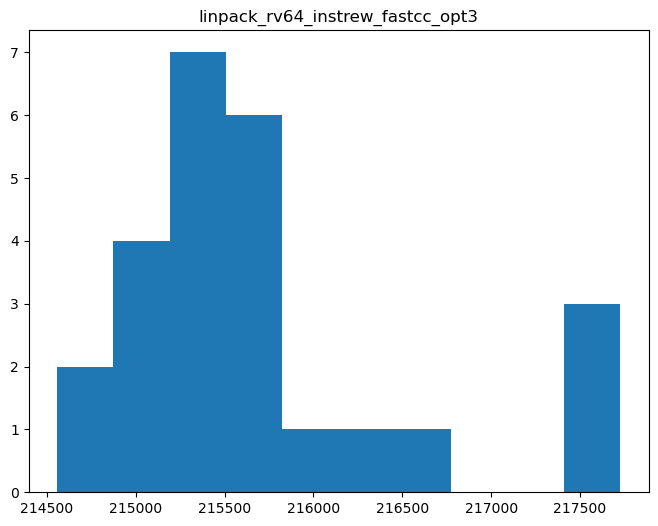

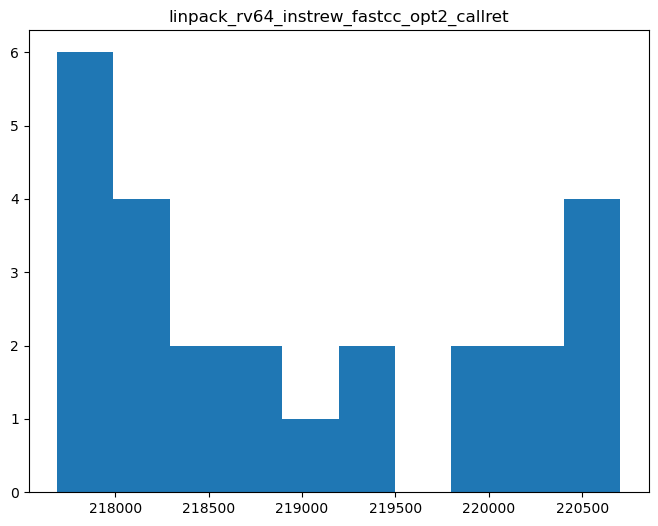

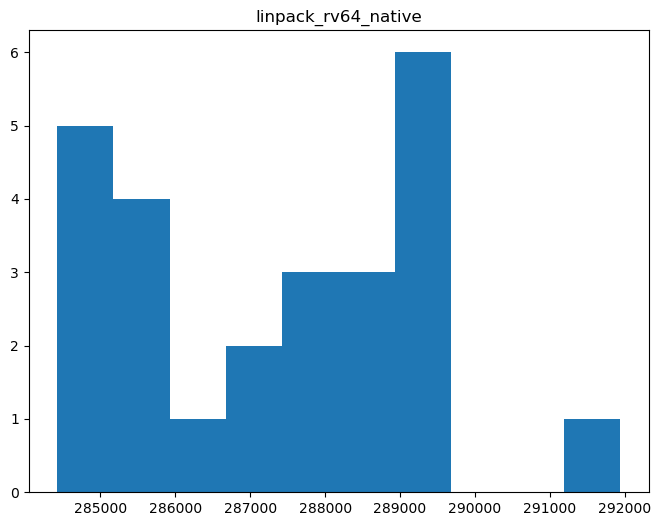

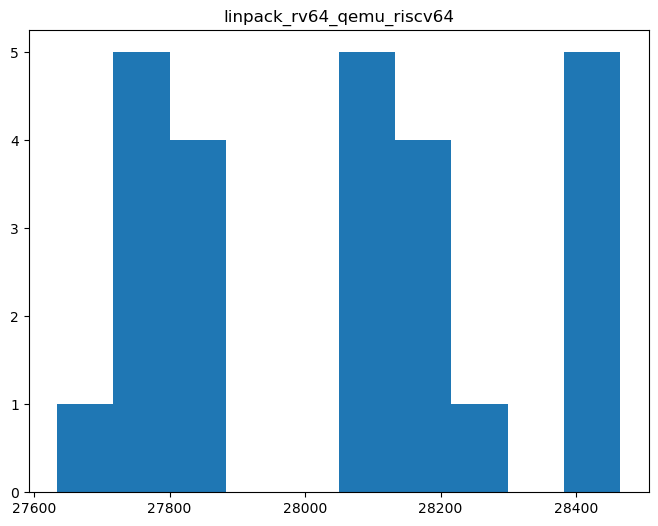

In [3]:
for key, val in data_dict.items():
    fig, ax = plt.subplots(figsize=(8, 6))  # Creates new figure and axis
    ax.hist(val)
    ax.set_title(key)
    plt.show()

# Нормальность

In [4]:
for key, val in data_dict.items():
    normaltest = stats.normaltest(val)
    shapirotest = stats.shapiro(val)
    print(f'Normaltest p-value for {key}: {normaltest[1]}')
    print(f'Shapirotest p-value for {key}: {shapirotest[1]}')
    if normaltest[1] > 0.05 or shapirotest[1]:
        print(f'Тест на нормальность в {key} пройден (p-value > 0.05 хоть на одном из тестов)')
    else: 
        print(f'Тест на нормальность в {key} не пройден (p-value < 0.05 на обоих тестах)')
    print("\n")

Normaltest p-value for linpack_x86_instrew_fastcc_opt2: 0.11222783969433467
Shapirotest p-value for linpack_x86_instrew_fastcc_opt2: 0.07743991911411285
Тест на нормальность в linpack_x86_instrew_fastcc_opt2 пройден (p-value > 0.05 хоть на одном из тестов)


Normaltest p-value for linpack_x86_instrew_fastcc_opt3: 0.19299719641697022
Shapirotest p-value for linpack_x86_instrew_fastcc_opt3: 0.004747788421809673
Тест на нормальность в linpack_x86_instrew_fastcc_opt3 пройден (p-value > 0.05 хоть на одном из тестов)


Normaltest p-value for linpack_x86_instrew_fastcc_opt2_callret: 0.46538408854604585
Shapirotest p-value for linpack_x86_instrew_fastcc_opt2_callret: 0.24316556751728058
Тест на нормальность в linpack_x86_instrew_fastcc_opt2_callret пройден (p-value > 0.05 хоть на одном из тестов)


Normaltest p-value for linpack_x86_box64: 0.025667515957123375
Shapirotest p-value for linpack_x86_box64: 1.407397121511167e-05
Тест на нормальность в linpack_x86_box64 пройден (p-value > 0.05 хоть 

# Среднее, стандартное отклонение и погрешность

In [5]:
for key, val in data_dict.items():
    mean = np.mean(val)
    error = 3*stats.sem(val)
    print(f'Среднее и погрешность для {key}: {mean:.3f} ± {error}')

Среднее и погрешность для linpack_x86_instrew_fastcc_opt2: 51272.898 ± 24.646050040126212
Среднее и погрешность для linpack_x86_instrew_fastcc_opt3: 51303.826 ± 26.975208165647224
Среднее и погрешность для linpack_x86_instrew_fastcc_opt2_callret: 51671.906 ± 30.884305196594656
Среднее и погрешность для linpack_x86_box64: 105420.431 ± 245.391096052016
Среднее и погрешность для linpack_x86_qemu_x86: 22119.673 ± 50.03009334717689
Среднее и погрешность для linpack_rv64_instrew_fastcc_opt2: 215297.874 ± 433.5968163480706
Среднее и погрешность для linpack_rv64_instrew_fastcc_opt3: 215743.690 ± 509.2347243887756
Среднее и погрешность для linpack_rv64_instrew_fastcc_opt2_callret: 218966.557 ± 644.7904411353968
Среднее и погрешность для linpack_rv64_native: 287315.871 ± 1189.6950434455014
Среднее и погрешность для linpack_rv64_qemu_riscv64: 28059.160 ± 158.61962531918817


In [6]:
for key, val in data_dict.items():
    std = np.std(val, ddof=1)
    print(f'Стандартное отклонение для {key}: {std}')

Стандартное отклонение для linpack_x86_instrew_fastcc_opt2: 41.076750066877025
Стандартное отклонение для linpack_x86_instrew_fastcc_opt3: 44.9586802760787
Стандартное отклонение для linpack_x86_instrew_fastcc_opt2_callret: 51.473841994324424
Стандартное отклонение для linpack_x86_box64: 408.9851600866933
Стандартное отклонение для linpack_x86_qemu_x86: 91.3420356011264
Стандартное отклонение для linpack_rv64_instrew_fastcc_opt2: 722.6613605801176
Стандартное отклонение для linpack_rv64_instrew_fastcc_opt3: 848.7245406479593
Стандартное отклонение для linpack_rv64_instrew_fastcc_opt2_callret: 1074.6507352256613
Стандартное отклонение для linpack_rv64_native: 1982.8250724091688
Стандартное отклонение для linpack_rv64_qemu_riscv64: 264.366042198647


In [7]:
for key, val in data_dict.items():
    mean = np.mean(val)
    std = np.std(val, ddof=1)
    print(f'Стандартное отклонение для {key} {round(std/mean * 100)}% от среднего')

Стандартное отклонение для linpack_x86_instrew_fastcc_opt2 0% от среднего
Стандартное отклонение для linpack_x86_instrew_fastcc_opt3 0% от среднего
Стандартное отклонение для linpack_x86_instrew_fastcc_opt2_callret 0% от среднего
Стандартное отклонение для linpack_x86_box64 0% от среднего
Стандартное отклонение для linpack_x86_qemu_x86 0% от среднего
Стандартное отклонение для linpack_rv64_instrew_fastcc_opt2 0% от среднего
Стандартное отклонение для linpack_rv64_instrew_fastcc_opt3 0% от среднего
Стандартное отклонение для linpack_rv64_instrew_fastcc_opt2_callret 0% от среднего
Стандартное отклонение для linpack_rv64_native 1% от среднего
Стандартное отклонение для linpack_rv64_qemu_riscv64 1% от среднего


# Доверительный интервал

In [8]:
for key, val in data_dict.items():
    conf = stats.t.ppf(0.975, df=len(val)-1)*stats.sem(val)
    print(f'Погрешность для {key}: {conf}')

Погрешность для linpack_x86_instrew_fastcc_opt2: 16.955649075876238
Погрешность для linpack_x86_instrew_fastcc_opt3: 18.55803111089858
Погрешность для linpack_x86_instrew_fastcc_opt2_callret: 21.24735769071084
Погрешность для linpack_x86_box64: 168.82077672602642
Погрешность для linpack_x86_qemu_x86: 34.107676637437436
Погрешность для linpack_rv64_instrew_fastcc_opt2: 298.2999485290906
Погрешность для linpack_rv64_instrew_fastcc_opt3: 350.33627173234515
Погрешность для linpack_rv64_instrew_fastcc_opt2_callret: 443.59402133694743
Погрешность для linpack_rv64_native: 818.4699629810518
Погрешность для linpack_rv64_qemu_riscv64: 109.12493884741602


In [9]:
for key, val in data_dict.items():
    conf = stats.t.ppf(0.975, df=len(val)-1)*stats.sem(val)
    mean = np.mean(val)
    rounded_conf = round(conf, -1)
    print(f'Округленный доверительный интервал (FLOPS) для {key}: {rounded_conf}')
    rounded_mean_conf = round(mean, -1)
    print(f'Округленное среднее (FLOPS): {rounded_mean_conf}')
    print(f'95% Доверительный интервал: {rounded_mean_conf} +- {rounded_conf}')

Округленный доверительный интервал (FLOPS) для linpack_x86_instrew_fastcc_opt2: 20.0
Округленное среднее (FLOPS): 51270.0
95% Доверительный интервал: 51270.0 +- 20.0
Округленный доверительный интервал (FLOPS) для linpack_x86_instrew_fastcc_opt3: 20.0
Округленное среднее (FLOPS): 51300.0
95% Доверительный интервал: 51300.0 +- 20.0
Округленный доверительный интервал (FLOPS) для linpack_x86_instrew_fastcc_opt2_callret: 20.0
Округленное среднее (FLOPS): 51670.0
95% Доверительный интервал: 51670.0 +- 20.0
Округленный доверительный интервал (FLOPS) для linpack_x86_box64: 170.0
Округленное среднее (FLOPS): 105420.0
95% Доверительный интервал: 105420.0 +- 170.0
Округленный доверительный интервал (FLOPS) для linpack_x86_qemu_x86: 30.0
Округленное среднее (FLOPS): 22120.0
95% Доверительный интервал: 22120.0 +- 30.0
Округленный доверительный интервал (FLOPS) для linpack_rv64_instrew_fastcc_opt2: 300.0
Округленное среднее (FLOPS): 215300.0
95% Доверительный интервал: 215300.0 +- 300.0
Округленный 

# Предсказывающий интервал


In [10]:
for key, val in data_dict.items():
    std = np.std(val, ddof=1)
    pred = std * 2
    print(f'Погрешность для {key}: {pred}')

Погрешность для linpack_x86_instrew_fastcc_opt2: 82.15350013375405
Погрешность для linpack_x86_instrew_fastcc_opt3: 89.9173605521574
Погрешность для linpack_x86_instrew_fastcc_opt2_callret: 102.94768398864885
Погрешность для linpack_x86_box64: 817.9703201733867
Погрешность для linpack_x86_qemu_x86: 182.6840712022528
Погрешность для linpack_rv64_instrew_fastcc_opt2: 1445.3227211602352
Погрешность для linpack_rv64_instrew_fastcc_opt3: 1697.4490812959186
Погрешность для linpack_rv64_instrew_fastcc_opt2_callret: 2149.3014704513225
Погрешность для linpack_rv64_native: 3965.6501448183376
Погрешность для linpack_rv64_qemu_riscv64: 528.732084397294


In [12]:
for key, val in data_dict.items():
    std = np.std(val, ddof=1)
    pred = std * 2
    mean = np.mean(val)
    rounded_pred = round(pred, -2)
    print(f'Округленный предсказывающий интервал (FLOPS) для {key}: {rounded_pred}')
    rounded_mean_pred = round(mean, -2)
    print(f'Округленное среднее (FLOPS): {rounded_mean_pred}')
    print(f'95% Предсказывающий интервал: {rounded_mean_pred} ± {rounded_pred}')

Округленный предсказывающий интервал (FLOPS) для linpack_x86_instrew_fastcc_opt2: 100.0
Округленное среднее (FLOPS): 51300.0
95% Предсказывающий интервал: 51300.0 ± 100.0
Округленный предсказывающий интервал (FLOPS) для linpack_x86_instrew_fastcc_opt3: 100.0
Округленное среднее (FLOPS): 51300.0
95% Предсказывающий интервал: 51300.0 ± 100.0
Округленный предсказывающий интервал (FLOPS) для linpack_x86_instrew_fastcc_opt2_callret: 100.0
Округленное среднее (FLOPS): 51700.0
95% Предсказывающий интервал: 51700.0 ± 100.0
Округленный предсказывающий интервал (FLOPS) для linpack_x86_box64: 800.0
Округленное среднее (FLOPS): 105400.0
95% Предсказывающий интервал: 105400.0 ± 800.0
Округленный предсказывающий интервал (FLOPS) для linpack_x86_qemu_x86: 200.0
Округленное среднее (FLOPS): 22100.0
95% Предсказывающий интервал: 22100.0 ± 200.0
Округленный предсказывающий интервал (FLOPS) для linpack_rv64_instrew_fastcc_opt2: 1400.0
Округленное среднее (FLOPS): 215300.0
95% Предсказывающий интервал: 21